# PARISYA BOKINGS 202131119

### Import Library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset

In [12]:
data1 = pd.read_csv('salary_dataset.csv')

In [13]:
data1

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
data1.head() #melihat data teratas

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
data1.tail() #melihat data terbawah

,no,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [14]:
#menghapus kolom 'no'
data1 = data1.drop(['no'], axis=1) #menghapus 1 kolom kebawah
data1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


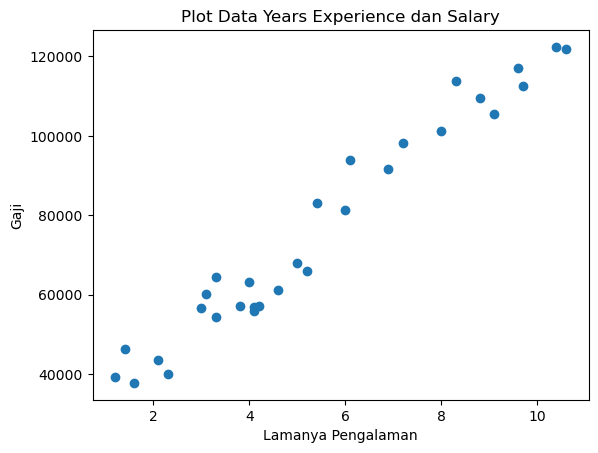

In [18]:
import matplotlib.pyplot as plt #melihat persebaran data

plt.scatter(data1.YearsExperience, data1.Salary) #scatter untuk membuat titik" pada grafik
#, color= ' ' untuk mengganti warna pada titik"
plt.xlabel('Lamanya Pengalaman') #mendatar. YearsExperience
plt.ylabel('Gaji') #lurus keatas. Salary
plt.title('Plot Data Years Experience dan Salary')
plt.show()

In [21]:
data2 = pd.read_csv('ini_dataset/data-penjualan.csv', delimiter=';') #delimeter: agar data bisa keluar semuanya, karena data1 sebelumnya di drop
data2.head()

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   promosi    15 non-null     int64
 1   penjualan  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


1). Kalau misalnya tipe datanya masih object atau kategori cal dia harus diubah terlebih dahulu.
2). Alurnya setelah kita melihat data set kita wajib melihat data info nya.
3). Arti dari 15 non-null : berarti tidak ada yang kosong dari 15 baris tersebut. Kalau ada yang kosong kita harus mengisi dengan data-data berdasarkan nilai modus/nilai rata" data tersebut.
4). Kalau tipe data nya masih object dan masih ada 2 data yang kosong kita harus mengisi 2 data yang kosong itu menggunakan nilai modus dari atribut tersebut. 

In [24]:
data2.describe()

,promosi,penjualan
count,15.000000,15.000000
mean,53.866667,143.466667
std,19.657302,28.083718
min,25.000000,100.000000
25%,32.500000,114.500000
50%,60.000000,150.000000
75%,70.500000,165.500000
max,80.000000,180.000000


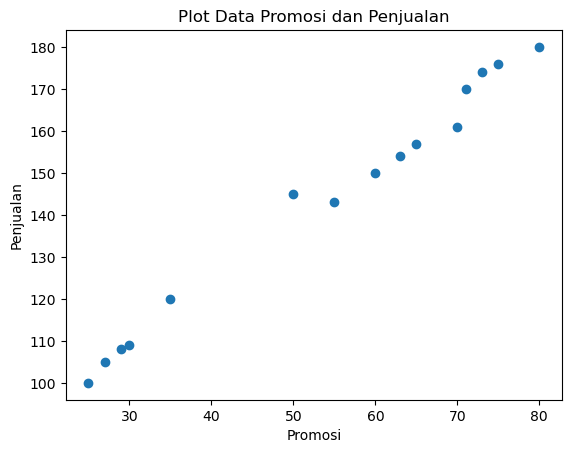

In [26]:
plt.scatter(data2.promosi, data2.penjualan) #scatter untuk membuat titik"
plt.xlabel('Promosi') #mendatar
plt.ylabel('Penjualan') #lurus keatas
plt.title('Plot Data Promosi dan Penjualan')
plt.show()
#persebaran data yang aslinya

### Korelasi

Pentingnya korelasi untuk mencari regresi.

In [28]:
data1.corr() #melihat korelasi

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Kalo nilai korelasi nya tinggi dia bisa diolah menggunakan regresi, Tapi kalau dibawah 50% dia tidak bisa diolah menggunakan regresi karena tidak berhubungan antar x dan y. Sedangkan regresi didapatkan nilainya dari keterhubungan antara dua atribut.

Untuk melihat atribut mana yang akan dipakai: Cari yang korelasinya terbesar, acuannya kepada nilai Y.

In [30]:
data2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


### Split Kolom

In [36]:
#data salary
years_exp = data1['YearsExperience'].values[:, np.newaxis] #x train nya
salary = data1['Salary'].values #y train nya

#data penjualan
promosi = data2['promosi'].values[:, np.newaxis] #x
penjualan = data2['penjualan'].values #y

#tidak pakai spplit train_test karena datanya masih sedikit, jadi semua datanya dipakai untuk training
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_started)

### Modeling

In [38]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression() #menguji dataset1
model2 = LinearRegression() #menguji dataset2

model1.fit(years_exp, salary) #yang dipakai data trainingnya
model2.fit(promosi,penjualan)

LinearRegression()

### Testing 

In [65]:
#dataset1
x_test_baru = [[1.1],[11],[7]]
pred_salary_baru = model1.predict(x_test_baru)

#dataset2
promosi_test = [[20],[100]]
pred_penjualan = model2.predict(promosi_test)

print("Prediksi Gaji: ", pred_salary_baru)
print("Preediksi Penjualan: ", pred_penjualan)

Prediksi Gaji:  [ 35243.16252012 128797.78950253  90997.94021671]
Preediksi Penjualan:  [ 95.38781949 208.95989944]


### Visualisasi

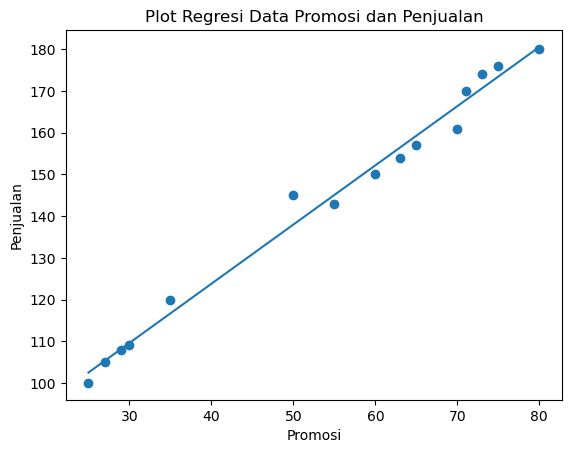

In [59]:
import matplotlib.pyplot as plt

prediksi_penjualan = model2.predict(promosi)
dataframe_baru = pd.DataFrame({'promosi': data2.promosi, 'penjualan': prediksi_penjualan})
plt.scatter(data2.promosi, data2.penjualan)
plt.plot(dataframe_baru.promosi, dataframe_baru.penjualan)
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title('Plot Regresi Data Promosi dan Penjualan')
plt.show()

### Cek Akurasi

In [74]:
from sklearn.metrics import r2_score
akurasi = r2_score(data2,dataframe_baru)
print(akurasi*100)

99.37098507592287


karena kalau akurasi 100% bisa dikatakan dia ada indikasi overfiting.

Kurang dari 70% itu kurang baik, tapi kalau 70-80% itu akurasinya sudah baik.

### Pembuktian Rumus

In [78]:
#Rumus Regresi y = a+bX (a = intercept, b = koefisien)

#dataset1
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

#dataset2
print("Koefisien: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Koefisien:  [9449.96232146]
Intercept:  24848.203966523193
Koefisien:  [1.419651]
Intercept:  66.99479949720258


In [79]:
#testing rumus

#dataset1
y = model1.intercept_+ model1.coef_*2.1 #x nya adalah x testing
print(y)

#dataset2
y = model2.intercept_+ model2.coef_*27 #x nya adalah x testing
print(y)

[44693.12484158]
[105.32537648]
